In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('train.csv')
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.Min-Max values are helpful to get an idea about the range of features and is helpful to outliers,max value of Fare seems strange but we will take it later
2.The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation.

3.This is important to give us a first perception about the volume of missing data. Here, we can see that some 'Age' data is missing.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerID is the unique id of person there is no need to include this or understand this just an identification number ,age got some missing values we have to take care of this

0    549
1    342
Name: Survived, dtype: int64


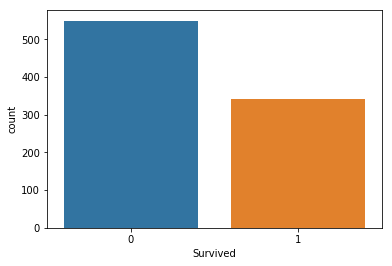

In [5]:
print(data['Survived'].value_counts())
sns.countplot(data['Survived'])


In [6]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
data['Sex'].value_counts()#we have to encode this categorical variable using one hot encoding

male      577
female    314
Name: Sex, dtype: int64

In [8]:
data['SibSp'].value_counts()#no of siblings/spouses on ship

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
data['Parch'].value_counts()#no of parents/childrens on ship

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

fare is continous variable and we need to understand the structure of ticket it's kind of mess

In [10]:
data['Embarked'].value_counts()#need to encode

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
total=data.isnull().sum().sort_values(ascending=False)
percent=100*(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1)
missing_data.head()

,0,1
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000


cabin has 77% of missing values so we need to drop this generally if missing values >25% we consider them to drop
age got 20% of missing values we can try to impute this

In [12]:
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
val=data['Age'].median()
data['Age'].fillna(val,inplace=True)

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#we can simply drop missing values with embarked as less no of missing values
data['Embarked'].fillna('S',inplace=True)
data.shape

(891, 11)

In [16]:
total=data.isnull().sum().sort_values(ascending=False)
percent=100*(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1)
missing_data.head()

,0,1
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


we don't need PassengerId for prediction as it won't help in predicting whether the person survived or not.         
Sex,Embarked,Pclass are categorical variables.      
Name,Ticket has to be parsed so we will see them later.   
SibSp and Parch acn be combined to form the family size of the person.

In [18]:
data.drop('PassengerId',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
data['Familysize']=data['SibSp']+data['Parch']
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [20]:
data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [21]:
data.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [22]:
#seems like Name and Ticket has nothing to do with the person whether survived or not
data.drop(['Name','Ticket'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [23]:
data=pd.get_dummies(data,drop_first=True)#to avoid dummy variable trap (multicollinearity)
data.head()

,Survived,Pclass,Age,Fare,Familysize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [24]:
Y=data['Survived']
data.drop('Survived',axis=1,inplace=True)

In [25]:
X=data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
yfit = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



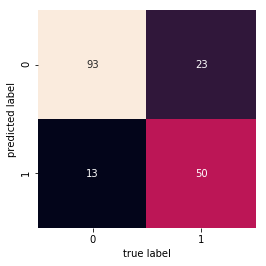

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


above approach we followed was kinda simple approach now we will try to visualize which variables affect the output

In [31]:
df=pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df['familysize']=df['Parch']+df['SibSp']

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
df.drop(['Parch','SibSp'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [35]:
#as from earlier knowledge we know PassengerID,Cabin and Ticket are irrelevant features so we can drop them
df.drop(['Ticket','Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0


our initial approach to impute values for age was simple but we can use title names for imputing the age and
will be good be imputed values for age instead of just filling by any median values

In [36]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

The rule seems to be: 'last name' + ',' + 'title' + 'other names'

In [37]:
df['title']=0
for i in range(891):
    ex=df['Name'][i].split(',')[1]
    df['title'][i]=ex.split('.')[0]
df.head()

/home/sanjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/sanjay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,Mr


In [38]:
df['title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

/home/sanjay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


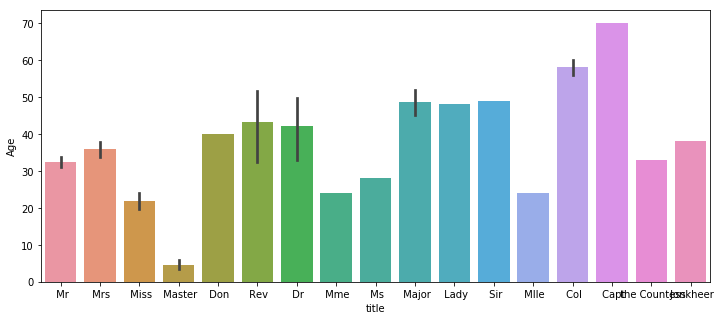

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['title'],y=df['Age'])
#apart from don and rev other have less error

In [40]:
means=df.groupby('title')['Age'].mean()
means

title
 Capt            70.000000
 Col             58.000000
 Don             40.000000
 Dr              42.000000
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           4.574167
 Miss            21.773973
 Mlle            24.000000
 Mme             24.000000
 Mr              32.368090
 Mrs             35.898148
 Ms              28.000000
 Rev             43.166667
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [41]:
means=means.to_dict()
means

{' Capt': 70.0,
 ' Col': 58.0,
 ' Don': 40.0,
 ' Dr': 42.0,
 ' Jonkheer': 38.0,
 ' Lady': 48.0,
 ' Major': 48.5,
 ' Master': 4.574166666666667,
 ' Miss': 21.773972602739725,
 ' Mlle': 24.0,
 ' Mme': 24.0,
 ' Mr': 32.368090452261306,
 ' Mrs': 35.898148148148145,
 ' Ms': 28.0,
 ' Rev': 43.166666666666664,
 ' Sir': 49.0,
 ' the Countess': 33.0}

In [43]:
import math
for i in range(891):
    if math.isnan(df['Age'][i]):
        df['Age'][i]=means[df['title'][i]]

/home/sanjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,Fare,familysize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.754659,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.277179,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.773973,7.910400,0.000000
50%,446.000000,0.000000,3.000000,30.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.898148,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


EXPLORATORY DATA ANALYSIS

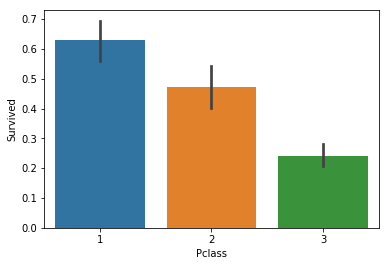

In [45]:
#let's first check how pclass is related with survived
sns.barplot(df['Pclass'],df['Survived'])
#clearly people with pclass1 has higher chances of survival

In [46]:
#now we assume  person's title name suggests how they are treated
df.groupby(df['title'])['PassengerId'].count()

title
 Capt              1
 Col               2
 Don               1
 Dr                7
 Jonkheer          1
 Lady              1
 Major             2
 Master           40
 Miss            182
 Mlle              2
 Mme               1
 Mr              517
 Mrs             125
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
Name: PassengerId, dtype: int64

In [47]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [48]:
df['title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Major             2
 Mlle              2
 Capt              1
 Jonkheer          1
 Don               1
 Sir               1
 Mme               1
 the Countess      1
 Lady              1
 Ms                1
Name: title, dtype: int64

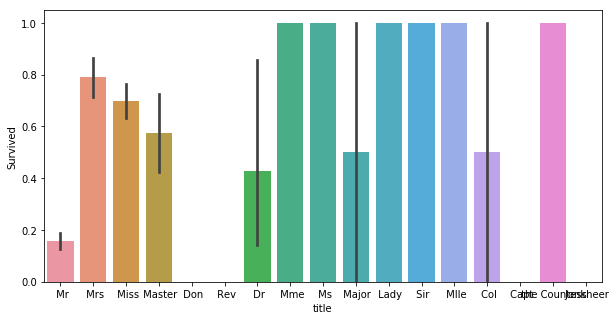

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(df['title'],df['Survived'])

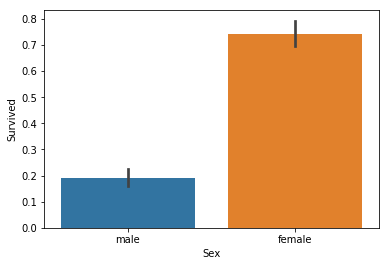

In [50]:
#sex
sns.barplot(df['Sex'],df['Survived'])
#Our hypothesis seems to be right. The world belongs to women, and so does the Titanic.

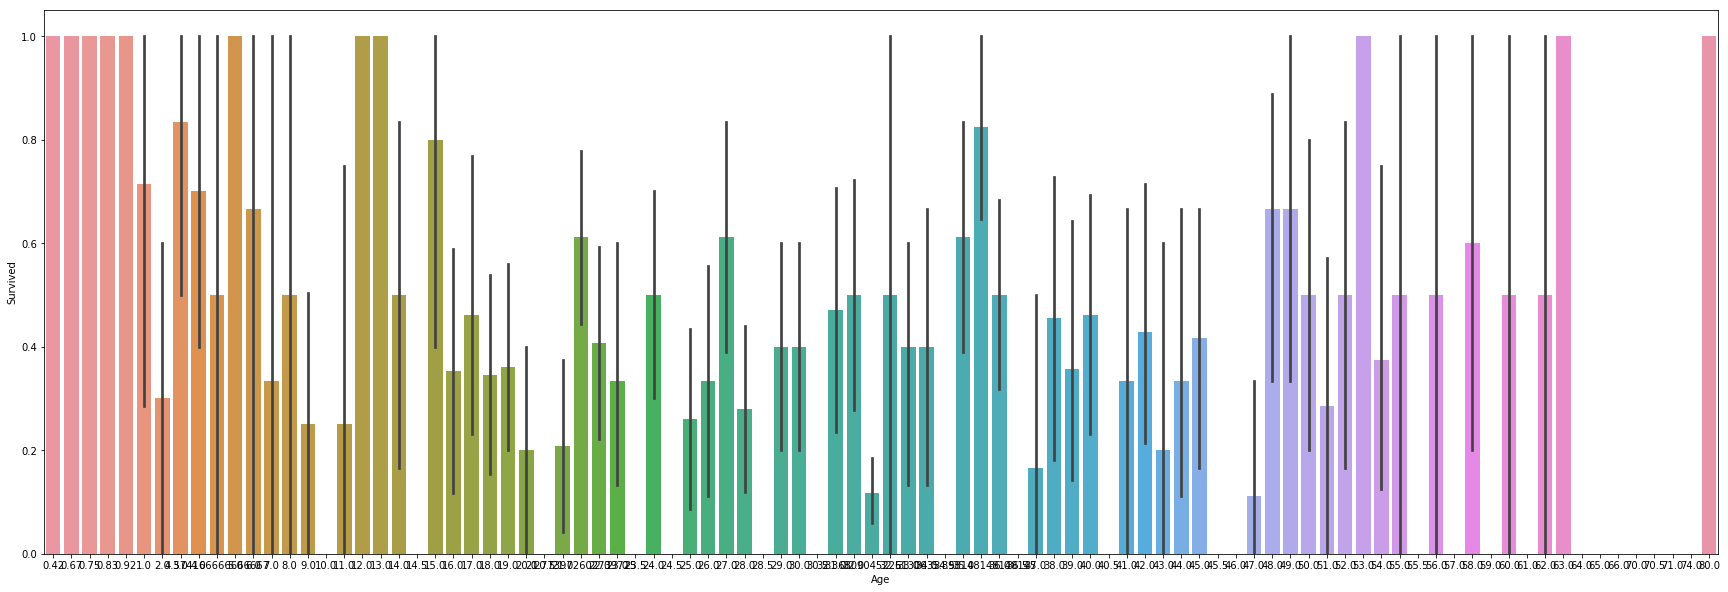

In [51]:
#age 
plt.figure(figsize=(30,10))
sns.barplot(df['Age'],df['Survived'])


In [52]:
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])#binning data
df['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

In [53]:
df['Age'].value_counts()

Adult    754
Child     73
Elder     64
Name: Age, dtype: int64

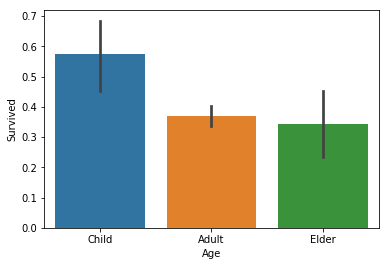

In [54]:
sns.barplot(df['Age'], df['Survived']);

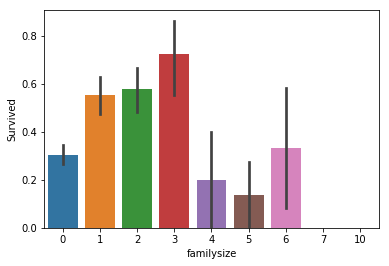

In [55]:
sns.barplot(df['familysize'],df['Survived'])

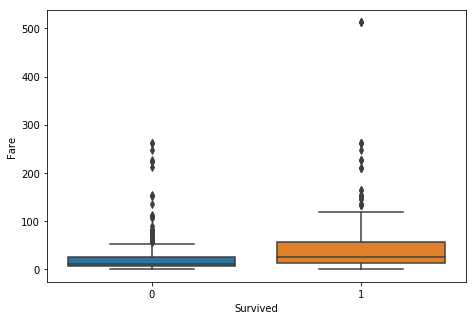

In [56]:
plt.figure(figsize=(7.5,5))
sns.boxplot(df['Survived'], df['Fare']);


above plot suggests that those who survived paid a higher fare
since we believed that fare is related to Pclass

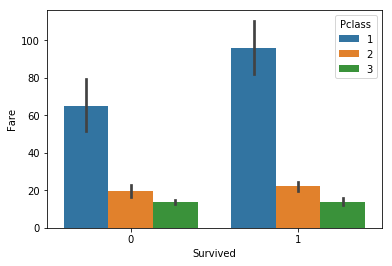

In [57]:
sns.barplot(df['Survived'],df['Fare'],df['Pclass'])

it seems that fair doesn't make differnce if you are travelling in second and third class but when travelling in 
first class higher fair has more survival rate
Considering this, it would make sense to create interaction features between 'Fare' and 'Pclass'.

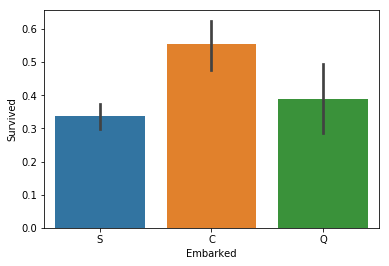

In [58]:
#embarked
sns.barplot(df['Embarked'],df['Survived'])

people embarking on C were selected by a superior entity to survive. 

In [59]:
df.groupby(df['Embarked']).mean()

,PassengerId,Survived,Pclass,Fare,familysize
Embarked,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000
Q,417.896104,0.389610,2.909091,13.276030,0.597403
S,449.527950,0.336957,2.350932,27.079812,0.984472


It seems that people embarking on C were paying more and travelling in a better class than people embarking on Q and S.

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,title
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,Adult,8.0500,S,0,Mr


In [61]:
df.drop('PassengerId',axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null category
Fare          891 non-null float64
Embarked      889 non-null object
familysize    891 non-null int64
title         891 non-null object
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 56.7+ KB


In [63]:
df.drop('Name',axis=1,inplace=True)

In [64]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,familysize,title
0,0,3,male,Adult,7.2500,S,1,Mr
1,1,1,female,Adult,71.2833,C,1,Mrs
2,1,3,female,Adult,7.9250,S,0,Miss
3,1,1,female,Adult,53.1000,S,1,Mrs
4,0,3,male,Adult,8.0500,S,0,Mr


In [65]:
df['title'].unique()
df.drop('title',axis=1,inplace=True)

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [69]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,familysize
0,0,3,male,Adult,7.2500,S,1
1,1,1,female,Adult,71.2833,C,1
2,1,3,female,Adult,7.9250,S,0
3,1,1,female,Adult,53.1000,S,1
4,0,3,male,Adult,8.0500,S,0


In [70]:
df = pd.get_dummies(df, drop_first=1)  
df.head()

,Survived,Pclass,Fare,familysize,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S
0,0,3,7.2500,1,1,1,0,0,1
1,1,1,71.2833,1,0,1,0,0,0
2,1,3,7.9250,0,0,1,0,0,1
3,1,1,53.1000,1,0,1,0,0,1
4,0,3,8.0500,0,1,1,0,0,1


In [71]:
from sklearn.model_selection import train_test_split
y = df['Survived']
df.drop('Survived',axis=1,inplace=True)
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [72]:
from scipy.stats import boxcox

X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare'] + 1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare'] + 1)[0]

In [73]:
# Rescale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)


/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [74]:
logreg = LogisticRegression()
logreg.fit(X_train_transformed_scaled, y_train)
yfit = logreg.predict(X_test_transformed_scaled)
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

   micro avg       0.79      0.79      0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


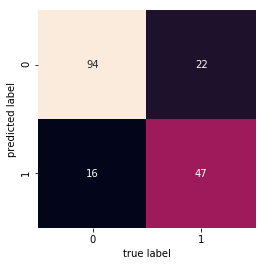

In [75]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

/home/sanjay/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


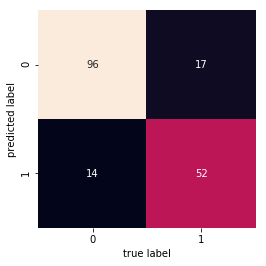

In [112]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',degree=3, C=100,class_weight='balanced')
svc.fit(X_train_transformed_scaled, y_train)
yfit = svc.predict(X_test_transformed_scaled)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

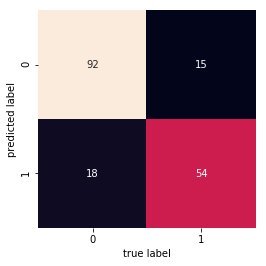

In [113]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf=QuadraticDiscriminantAnalysis()
clf.fit(X_train_transformed_scaled, y_train)
yfit = clf.predict(X_test_transformed_scaled)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');